# Applied Machine Learning 2021- Assignment 3

## Dissecting Spotify Valence

In this assignment we will dissect Spotify's Valence metric.

We will use the data that we retrieved from the Spotify API and stored in the csv file 'spotifyAPI_tracks_features.csv'. 

As mentioned in the notebook 'assignment3_spotifyapi.ipynb', I chose a [dataset from Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) and I used the track ids to get the audio features from the Spotify API using my credentials. I used this dataset because it had a number of 232,725 total tracks and specifically 176.774 unique track_ids. Moreover, there are 26 total genres which I thought might be good for our further analysis as there is representation from a lot of different genres.

* Although the audio features where included in the initial dataset, I chose to repeat the procedure in order to explore Spotify API's functionality

---

> Student Name: Aikaterini Dimatou </br>
> AM: 8180199
> University: Athens University of Economics and Business <br />
> Email: t8180199@aueb.gr

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We will read directly the csv, where we stored the data we retrieved from the Spotify API.

In [2]:
tracks = pd.read_csv('spotifyAPI_tracks_features.csv')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,song_id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.389,0.910,1,-1.828,1,0.0525,0.6110,0.000000,0.3460,0.816,166.969,audio_features,0BRjO6ga9RKCKjfDqeFgWV,spotify:track:0BRjO6ga9RKCKjfDqeFgWV,https://api.spotify.com/v1/tracks/0BRjO6ga9RKC...,https://api.spotify.com/v1/audio-analysis/0BRj...,99373,4
1,0.591,0.737,6,-5.559,0,0.0877,0.2460,0.000000,0.1510,0.815,174.003,audio_features,0BjC1NfoEOOusryehmNudP,spotify:track:0BjC1NfoEOOusryehmNudP,https://api.spotify.com/v1/tracks/0BjC1NfoEOOu...,https://api.spotify.com/v1/audio-analysis/0BjC...,137373,4
2,0.663,0.131,0,-13.879,0,0.0362,0.9520,0.000000,0.1030,0.368,99.488,audio_features,0CoSDzoNIKCRs124s9uTVy,spotify:track:0CoSDzoNIKCRs124s9uTVy,https://api.spotify.com/v1/tracks/0CoSDzoNIKCR...,https://api.spotify.com/v1/audio-analysis/0CoS...,170267,5
3,0.241,0.326,1,-12.178,1,0.0390,0.7030,0.000000,0.0985,0.226,171.782,audio_features,0Gc6TVm52BwZD07Ki6tIvf,spotify:track:0Gc6TVm52BwZD07Ki6tIvf,https://api.spotify.com/v1/tracks/0Gc6TVm52BwZ...,https://api.spotify.com/v1/audio-analysis/0Gc6...,152427,4
4,0.331,0.225,5,-21.150,1,0.0456,0.9500,0.123000,0.2020,0.390,140.576,audio_features,0IuslXpMROHdEPvSl1fTQK,spotify:track:0IuslXpMROHdEPvSl1fTQK,https://api.spotify.com/v1/tracks/0IuslXpMROHd...,https://api.spotify.com/v1/audio-analysis/0Ius...,82625,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,0.736,0.701,10,-4.345,0,0.1000,0.2310,0.000000,0.2030,0.770,99.991,audio_features,1U0OMWvR89Cm20vCNar50f,spotify:track:1U0OMWvR89Cm20vCNar50f,https://api.spotify.com/v1/tracks/1U0OMWvR89Cm...,https://api.spotify.com/v1/audio-analysis/1U0O...,222667,4
176770,0.802,0.516,2,-9.014,1,0.2140,0.1040,0.000472,0.1050,0.482,175.663,audio_features,2gGqKJWfWbToha2YmDxnnj,spotify:track:2gGqKJWfWbToha2YmDxnnj,https://api.spotify.com/v1/tracks/2gGqKJWfWbTo...,https://api.spotify.com/v1/audio-analysis/2gGq...,201173,4
176771,0.423,0.337,10,-13.092,0,0.0436,0.5660,0.000000,0.2760,0.497,80.023,audio_features,2iZf3EUedz9MPqbAvXdpdA,spotify:track:2iZf3EUedz9MPqbAvXdpdA,https://api.spotify.com/v1/tracks/2iZf3EUedz9M...,https://api.spotify.com/v1/audio-analysis/2iZf...,144667,4
176772,0.785,0.683,4,-6.944,0,0.0337,0.0329,0.000880,0.2370,0.969,113.830,audio_features,1qWZdkBl4UVPj9lK6HuuFM,spotify:track:1qWZdkBl4UVPj9lK6HuuFM,https://api.spotify.com/v1/tracks/1qWZdkBl4UVP...,https://api.spotify.com/v1/audio-analysis/1qWZ...,282447,4


## Q1

First, we are going to check whether there is difference in the standard deviation of the features, in order to find out whether we will need to standarize them.

In [3]:
tracks.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000
mean,0.540909,0.556792,5.225571,-10.142202,0.659611,0.127055,0.403881,0.172019,0.224265,0.451418,117.255043,2.361172e+05,3.867367
std,0.190616,0.276107,3.550052,6.401075,0.473841,0.204241,0.366386,0.322912,0.210926,0.267940,31.332890,1.305143e+05,0.495220
min,0.000000,0.000020,0.000000,-52.458000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,1.538700e+04,0.000000
25%,0.415000,0.343000,2.000000,-12.855000,0.000000,0.036800,0.045300,0.000000,0.097400,0.222000,92.013000,1.782405e+05,4.000000
50%,0.558000,0.592000,5.000000,-8.194000,1.000000,0.049300,0.288000,0.000070,0.130000,0.440000,115.021000,2.194290e+05,4.000000
75%,0.683000,0.789000,8.000000,-5.633000,1.000000,0.101000,0.791000,0.090875,0.277000,0.667000,138.888000,2.685330e+05,4.000000
max,0.989000,0.999000,11.000000,3.744000,1.000000,0.967000,0.996000,0.999000,1.000000,1.000000,243.372000,5.552917e+06,5.000000


* As we can see there is big difference in the standard deviation of the music features, so we are going standarize them using StandardScaler() provided by Scikit Learn. 

* Also, we are going to create dummy variables for the variables 'key' and 'time signature' because as we read in the [Spotify API documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) they are categorical variables. 

* We will store the data that we want to standarize -all features apart from our target feature valence- in a dataframe to_scale 

In [4]:
important_data = tracks[['valence', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']].copy()
to_scale = tracks[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']].copy()
important_data = pd.get_dummies(important_data, columns=["key", 'time_signature'], drop_first=True)
to_scale = pd.get_dummies(to_scale, columns=["key", 'time_signature'], drop_first=True)
to_scale

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.389,0.910,-1.828,1,0.0525,0.6110,0.000000,0.3460,166.969,99373,...,0,0,0,0,0,0,0,0,1,0
1,0.591,0.737,-5.559,0,0.0877,0.2460,0.000000,0.1510,174.003,137373,...,1,0,0,0,0,0,0,0,1,0
2,0.663,0.131,-13.879,0,0.0362,0.9520,0.000000,0.1030,99.488,170267,...,0,0,0,0,0,0,0,0,0,1
3,0.241,0.326,-12.178,1,0.0390,0.7030,0.000000,0.0985,171.782,152427,...,0,0,0,0,0,0,0,0,1,0
4,0.331,0.225,-21.150,1,0.0456,0.9500,0.123000,0.2020,140.576,82625,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,0.736,0.701,-4.345,0,0.1000,0.2310,0.000000,0.2030,99.991,222667,...,0,0,0,0,1,0,0,0,1,0
176770,0.802,0.516,-9.014,1,0.2140,0.1040,0.000472,0.1050,175.663,201173,...,0,0,0,0,0,0,0,0,1,0
176771,0.423,0.337,-13.092,0,0.0436,0.5660,0.000000,0.2760,80.023,144667,...,0,0,0,0,1,0,0,0,1,0
176772,0.785,0.683,-6.944,0,0.0337,0.0329,0.000880,0.2370,113.830,282447,...,0,0,0,0,0,0,0,0,1,0


In [5]:
important_data.columns

Index(['valence', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standarized_tracks = pd.DataFrame(StandardScaler().fit_transform(to_scale))
standarized_tracks

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.796939,1.279246,1.298879,0.718363,-0.365034,0.565305,-0.532712,0.577146,1.586643,-1.047736,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
1,0.262788,0.652675,0.716007,-1.392053,-0.192688,-0.430914,-0.532712,-0.347352,1.811136,-0.756579,...,3.820034,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
2,0.640512,-1.542134,-0.583778,-1.392053,-0.444842,1.496019,-0.532712,-0.574921,-0.567043,-0.504545,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,-2.323936,6.232245
3,-1.573372,-0.835884,-0.318041,0.718363,-0.431132,0.816406,-0.532712,-0.596255,1.740252,-0.641235,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
4,-1.101217,-1.201685,-1.719684,0.718363,-0.398818,1.490560,-0.151802,-0.105560,0.744299,-1.176060,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,1.023483,0.522291,0.905663,-1.392053,-0.132465,-0.471855,-0.532712,-0.100819,-0.550989,-0.103055,...,-0.261778,-0.361928,-0.259935,-0.331976,3.711702,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
176770,1.369730,-0.147742,0.176252,0.718363,0.425699,-0.818484,-0.531250,-0.565439,1.864115,-0.267743,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
176771,-0.618569,-0.796044,-0.460830,-1.392053,-0.408610,0.442483,-0.532712,0.245275,-1.188277,-0.700693,...,-0.261778,-0.361928,-0.259935,-0.331976,3.711702,-0.280639,-0.115647,-0.365537,0.430304,-0.160456
176772,1.280545,0.457098,0.499637,-1.392053,-0.457082,-1.012542,-0.529987,0.060375,-0.109312,0.354980,...,-0.261778,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456


After our data are standarized, we will add again the column valence

In [7]:
standarized_tracks.columns=['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7','key_8', 'key_9', 'key_10', 'key_11','time_signature_1', 'time_signature_3', 'time_signature_4','time_signature_5']
standarized_tracks['valence']= important_data.valence.copy()
standarized_tracks

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
0,-0.796939,1.279246,1.298879,0.718363,-0.365034,0.565305,-0.532712,0.577146,1.586643,-1.047736,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.816
1,0.262788,0.652675,0.716007,-1.392053,-0.192688,-0.430914,-0.532712,-0.347352,1.811136,-0.756579,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.815
2,0.640512,-1.542134,-0.583778,-1.392053,-0.444842,1.496019,-0.532712,-0.574921,-0.567043,-0.504545,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,-2.323936,6.232245,0.368
3,-1.573372,-0.835884,-0.318041,0.718363,-0.431132,0.816406,-0.532712,-0.596255,1.740252,-0.641235,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.226
4,-1.101217,-1.201685,-1.719684,0.718363,-0.398818,1.490560,-0.151802,-0.105560,0.744299,-1.176060,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,1.023483,0.522291,0.905663,-1.392053,-0.132465,-0.471855,-0.532712,-0.100819,-0.550989,-0.103055,...,-0.361928,-0.259935,-0.331976,3.711702,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.770
176770,1.369730,-0.147742,0.176252,0.718363,0.425699,-0.818484,-0.531250,-0.565439,1.864115,-0.267743,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.482
176771,-0.618569,-0.796044,-0.460830,-1.392053,-0.408610,0.442483,-0.532712,0.245275,-1.188277,-0.700693,...,-0.361928,-0.259935,-0.331976,3.711702,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.497
176772,1.280545,0.457098,0.499637,-1.392053,-0.457082,-1.012542,-0.529987,0.060375,-0.109312,0.354980,...,-0.361928,-0.259935,-0.331976,-0.269418,-0.280639,-0.115647,-0.365537,0.430304,-0.160456,0.969


In [8]:
standarized_tracks.describe()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
count,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,...,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,1.767740e+05,176774.000000
mean,1.749286e-16,8.153552e-16,-4.302471e-16,6.624133e-17,7.074316e-17,-4.373214e-17,7.717436e-18,3.479277e-16,2.546754e-16,8.457024e-17,...,-7.010004e-17,-2.218763e-17,5.402205e-17,-3.448729e-17,-3.939108e-17,4.437526e-17,2.443855e-17,1.157615e-17,4.469682e-17,0.451418
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.267940
min,-2.837699e+00,-2.016516e+00,-6.610751e+00,-1.392053e+00,-6.220834e-01,-1.102338e+00,-5.327119e-01,-1.017400e+00,-3.742246e+00,-1.691238e+00,...,-3.619277e-01,-2.599348e-01,-3.319761e-01,-2.694182e-01,-2.806395e-01,-1.156467e-01,-3.655369e-01,-2.323936e+00,-1.604558e-01,0.000000
25%,-6.605384e-01,-7.743129e-01,-4.238047e-01,-1.392053e+00,-4.419039e-01,-9.786979e-01,-5.327119e-01,-6.014705e-01,-8.056108e-01,-4.434519e-01,...,-3.619277e-01,-2.599348e-01,-3.319761e-01,-2.694182e-01,-2.806395e-01,-1.156467e-01,-3.655369e-01,4.303044e-01,-1.604558e-01,0.222000
50%,8.966408e-02,1.275146e-01,3.043563e-01,7.183634e-01,-3.807017e-01,-3.162807e-01,-5.324936e-01,-4.469134e-01,-7.130044e-02,-1.278649e-01,...,-3.619277e-01,-2.599348e-01,-3.319761e-01,-2.694182e-01,-2.806395e-01,-1.156467e-01,-3.655369e-01,4.303044e-01,-1.604558e-01,0.440000
75%,7.454355e-01,8.410088e-01,7.044464e-01,7.183634e-01,-1.275692e-01,1.056591e+00,-2.512879e-01,2.500162e-01,6.904252e-01,2.483707e-01,...,-3.619277e-01,-2.599348e-01,-3.319761e-01,-2.694182e-01,-2.806395e-01,-1.156467e-01,-3.655369e-01,4.303044e-01,-1.604558e-01,0.667000
max,2.350764e+00,1.601586e+00,2.169361e+00,7.183634e-01,4.112523e+00,1.616111e+00,2.561017e+00,3.677772e+00,4.025078e+00,4.073741e+01,...,2.762983e+00,3.847119e+00,3.012265e+00,3.711702e+00,3.563291e+00,8.647029e+00,2.735702e+00,4.303044e-01,6.232245e+00,1.000000


We will try to understand which features influence more the valence metric by using a linear regression.
* As we can see, a lot of the features are statistically important and influence the valence metric.  
* Our R-squared equals 0.453 which is considered a generally low effect, but not insignificant.
* The variables that are not statistically significant are: key_3, key_10, time_signature_1, time_signature_3, time_signature_4 and time_signature_5

In [9]:
mod_valence_ols = smf.ols("valence ~ danceability + energy + loudness + mode + speechiness + acousticness + instrumentalness + liveness + tempo + duration_ms + key_1 + key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 + key_10 + key_11 + time_signature_1 + time_signature_3 + time_signature_4 + time_signature_5", data=standarized_tracks)
valence_ols_res = mod_valence_ols.fit()
valence_ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     5861.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:17:21   Log-Likelihood:                 35342.
No. Observations:              176774   AIC:                        -7.063e+04
Df Residuals:                  176748   BIC:                        -7.037e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4514      0.000    957.900      0.000       0.450       0.452
danceability         0.1411      0.001    242.758      0.000       0.140       0.142
energy               0.1346      0.001    129.177      0.000       0.133       0.137
loudness            -0.0493      0.001    -50.797      0.000      -0.051      -0.047
mode                 0.0082      0.000     16.818      0.000       0.007       0.009
speechiness         -0.0442      0.001    -68.209      0.000      -0.045      -0.043
acousticness         0.0449      0.001     55.900      0.000       0.043       0.046
instrumentalness    -0.0269      0.001    -46.846      0.000      -0.028      -0.026
liveness            -0.0014      0.001     -2.433      0.015      -0.003      -0.000
tempo                0.0187      0.000     37.744      0.000       0.018       0.020
duration_ms         -0.0184      0.000    -38.485      0.000      -0.019      -0.017
key_1               -0.0102      0.001    -16.881      0.000      -0.011      -0.009
key_2               -0.0034      0.001     -5.527      0.000      -0.005      -0.002
key_3               -0.0002      0.001     -0.324      0.746      -0.001       0.001
key_4               -0.0029      0.001     -4.913      0.000      -0.004      -0.002
key_5                0.0028      0.001      4.709      0.000       0.002       0.004
key_6               -0.0028      0.001     -4.908      0.000      -0.004      -0.002
key_7                0.0016      0.001      2.495      0.013       0.000       0.003
key_8               -0.0024      0.001     -4.269      0.000      -0.004      -0.001
key_9                0.0016      0.001      2.707      0.007       0.000       0.003
key_10               0.0007      0.001      1.157      0.247      -0.000       0.002
key_11              -0.0026      0.001     -4.385      0.000      -0.004      -0.001
time_signature_1     0.0059      0.007      0.909      0.363      -0.007       0.019
time_signature_3     0.0133      0.018      0.723      0.470      -0.023       0.050
time_signature_4     0.0183      0.021      0.880      0.379      -0.022       0.059
time_signature_5     0.0062      0.009      0.689      0.491      -0.011       0.024
==============================================================================
Omnibus:                      239.706   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.218
Skew:                           0.020   Prob(JB):                     4.51e-45
Kurtosis:                       2.839   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We now want to find the best model for the number of variables we have.

* Due to the fact that the number of our independent variables is large, we will use *forward stepwise selection*.

* We find the best model for each number of variables (starting with one) by adding another variable in every iteration.

* This is *not* guaranteed to find the best model overall, only for each number of variables.

* We write `forward_add_variable()` to find the best variable to add at each step.

In [10]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [11]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [12]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [13]:
best_model, best_models = forward_stepwise_selection(standarized_tracks, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'speechiness']
Finding the best model for 4 variables
['danceability', 'energy', 'speechiness', 'acousticness']
Finding the best model for 5 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms', 'tempo']
Finding the best model for 7 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms', 'tempo', 'loudness']
Finding the best model for 8 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms', 'tempo', 'loudness', 'instrumentalness']
Finding the best model for 9 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms', 'tempo', 'loudness', 'instrumentalness', 'key_1']
Finding the best mod

In [14]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     6370.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:18:00   Log-Likelihood:                 35341.
No. Observations:              176774   AIC:                        -7.063e+04
Df Residuals:                  176750   BIC:                        -7.039e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.4514      0.000    957.903      0.000       0.450       0.452
danceability         0.1411      0.001    242.826      0.000       0.140       0.142
energy               0.1346      0.001    129.175      0.000       0.133       0.137
speechiness         -0.0442      0.001    -68.361      0.000      -0.046      -0.043
acousticness         0.0449      0.001     55.914      0.000       0.043       0.046
duration_ms         -0.0184      0.000    -38.483      0.000      -0.019      -0.017
tempo                0.0187      0.000     37.775      0.000       0.018       0.020
loudness            -0.0493      0.001    -50.793      0.000      -0.051      -0.047
instrumentalness    -0.0269      0.001    -46.839      0.000      -0.028      -0.026
key_1               -0.0102      0.001    -16.887      0.000      -0.011      -0.009
mode                 0.0082      0.000     16.827      0.000       0.007       0.009
key_5                0.0028      0.001      4.703      0.000       0.002       0.004
key_9                0.0017      0.001      2.708      0.007       0.000       0.003
key_7                0.0016      0.001      2.496      0.013       0.000       0.003
time_signature_4     0.0034      0.001      6.250      0.000       0.002       0.004
key_10               0.0007      0.001      1.154      0.248      -0.000       0.002
key_3               -0.0002      0.001     -0.326      0.744      -0.001       0.001
time_signature_1     0.0013      0.000      2.592      0.010       0.000       0.002
liveness            -0.0014      0.001     -2.430      0.015      -0.003      -0.000
key_2               -0.0034      0.001     -5.531      0.000      -0.005      -0.002
key_6               -0.0028      0.001     -4.913      0.000      -0.004      -0.002
key_4               -0.0029      0.001     -4.912      0.000      -0.004      -0.002
key_11              -0.0026      0.001     -4.388      0.000      -0.004      -0.001
key_8               -0.0024      0.001     -4.274      0.000      -0.004      -0.001
==============================================================================
Omnibus:                      239.614   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.141
Skew:                           0.020   Prob(JB):                     4.69e-45
Kurtosis:                       2.839   Cond. No.                         5.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q2

* We will use Machine Learning techniques in order to predict valence, using all the tracks features in order to find the best model and use it so that we can explain which of them influence valence metric.

* We will use a *sample* of our data in order for our models to produce results faster.

* We will use the parameter random_state in order to get the same results every time we run the method df.sample()

In [15]:
data = important_data.sample(frac=0.25, random_state = 0)
data

,valence,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
14244,0.757,0.769,0.5050,-7.345,1,0.0829,0.31100,0.000075,0.0777,171.804,...,0,0,0,0,0,0,0,0,1,0
54297,0.186,0.250,0.0269,-22.489,0,0.0437,0.97200,0.028800,0.0892,64.140,...,0,0,0,0,0,0,0,0,1,0
70767,0.475,0.544,0.1690,-15.329,1,0.0447,0.37400,0.000000,0.1540,131.395,...,0,0,0,0,0,0,0,0,1,0
142728,0.956,0.802,0.6870,-5.052,1,0.1240,0.23400,0.000007,0.2120,146.052,...,0,1,0,0,0,0,0,0,1,0
107883,0.182,0.700,0.4990,-10.219,1,0.2280,0.06550,0.000000,0.1090,129.949,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134670,0.130,0.288,0.8020,-8.400,1,0.0493,0.00257,0.780000,0.3430,120.210,...,0,0,1,0,0,0,0,0,1,0
116671,0.225,0.769,0.4250,-8.993,0,0.0717,0.12300,0.000148,0.1340,128.009,...,0,0,0,0,0,0,0,0,1,0
151682,0.466,0.453,0.4430,-9.022,1,0.0273,0.53500,0.000048,0.1590,94.614,...,0,0,0,0,1,0,0,0,1,0
129293,0.406,0.534,0.6830,-14.721,0,0.9330,0.87700,0.000000,0.9430,79.015,...,0,0,0,0,0,0,0,0,1,0


* We will split our data in training and testing in order to use a part of our dataset for training, and a part of it to evaluate our models.

* We will split the dataset in two, 80% will go for training and 20% will go for testing.

In [16]:
from sklearn.model_selection import train_test_split

X, y = (data.loc[:, data.columns != 'valence'].values, 
       data.valence.values)

# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

print(X_train.shape, y_train.shape)

(35355, 25) (35355,)


* We will `regression` in order to predict valence as regression is the task of predicting a continuous quantity.

* For each technique we start with random parameters and then we use `GridSearchCV` and `KFold Cross Validation` in order to tune our hyperparameters.

* In order to evaluate our model we will use `R2 Score` and `Mean Absolute Error`.

* We do not standarize our data for trees and forest because they are scale-invariant.



### Model 1: AdaBoostRegressor

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor


parameters = [
  {'max_depth': list(range(1, 26))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=8)
{'max_depth': 8}


In [18]:
from sklearn.ensemble import AdaBoostRegressor

clf = DecisionTreeRegressor(max_depth=7)
rgr = AdaBoostRegressor(clf, n_estimators=5000)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

rgr.fit(X_train, y_train)
predicted = rgr.predict(X_test)

print('R2 Score:',metrics.r2_score(y_test, predicted))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, predicted))

R2 Score: 0.2465900834096988
Mean Absolute Error : 0.20077281059740057


### Model 2: DecisionTreeRegressor

At first we will try DecisionTreeRegressor with untuned parameters

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

val_tree = DecisionTreeRegressor(criterion= "absolute_error", max_depth=4)

val_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4)

In [21]:
pred = val_tree.predict(X_test)
print('R2 Score:',metrics.r2_score(y_test, pred))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, pred))

R2 Score: 0.40116273511333644
Mean Absolute Error : 0.16360273786627447


We will now use GridSearchCV() and KFold Cross Validation in order to find the appropriate depth

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

parameters = [
  {'max_depth': list(range(1, 26))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
dectree = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

dectree = dectree.fit(X_train, y_train)
print(dectree.best_estimator_)
print(dectree.best_params_)


DecisionTreeRegressor(max_depth=8)
{'max_depth': 8}


Using the depth that turned out to be more appropriate, we end up with the following results

In [23]:
tuned_dectree = DecisionTreeRegressor(criterion= "absolute_error", max_depth=8)
tuned_dectree = tuned_dectree.fit(X_train, y_train)

print('R2 Score:',metrics.r2_score(y_test, tuned_dectree.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, tuned_dectree.predict(X_test)))


R2 Score: 0.4587348117458062
Mean Absolute Error : 0.1530395463287702


### Model 3: Random Forest Regressor 

At first we will try RandomForestRegressor with untuned parameters

In [24]:
from sklearn.ensemble import RandomForestRegressor

randomreg = RandomForestRegressor(criterion= "absolute_error", n_estimators = 20, random_state = 13)
randomreg.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=20,
                      random_state=13)

In [25]:
y4_pred = randomreg.predict(X_test)
print('R2 Score:',metrics.r2_score(y_test, y4_pred))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, y4_pred))


R2 Score: 0.5424294630746105
Mean Absolute Error : 0.14207694026473583


We will now use GridSearchCV() and KFold Cross Validation in order to find the appropriate number for n_estimators parameter

In [26]:
parameters = [
  {'n_estimators': (300,500,1000)}
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
random = GridSearchCV(RandomForestRegressor(), parameters, cv=cv)

random = random.fit(X_train, y_train)

print(random.best_estimator_)
print(random.best_params_)

RandomForestRegressor(n_estimators=1000)
{'n_estimators': 1000}


Using the number of n_estimators that turned out to be more appropriate, we end up with the following results, which are the best so far

In [27]:
tuned_randomreg= RandomForestRegressor(n_estimators=1000, random_state = 13)
tuned_randomreg= tuned_randomreg.fit(X_train, y_train)

print('R2 Score:',metrics.r2_score(y_test, tuned_randomreg.predict(X_test)))
print('Mean Absolute Error:', mean_absolute_error(y_test, tuned_randomreg.predict(X_test)))


R2 Score: 0.5676020181198542
Mean Absolute Error: 0.13816663227740694


### Model 4: Bagging Regressor

* We did not set a base_estimator because the default base_estimator is DecisionTreeRegressor() with which we managed to get good results before

In [28]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(n_estimators=30, random_state=0).fit(X_train, y_train)

bag_pred = bag.predict(X_test)

print('R2 Score:',metrics.r2_score(y_test, bag_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, bag_pred))

R2 Score: 0.5523360985147288
Mean Absolute Error: 0.1400690319417732


### Model 5: KNN Regressor

For KNN Regressor and SGD Regressor we need to standarize our data, so we use StandardScaler() and we standarize both the training and the testing dataset (not y_train and y_test that is our target-valence)

In [29]:
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.fit_transform(X_test)

* We will now use GridSearchCV() and KFold Cross Validation in order to find the appropriate number for n_neighbors and p parameters

* By tuning the parameters we get the following results

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

parameters = [
  {'n_neighbors': list(range(1, 26)), 'p': (1,2)}
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
knn = GridSearchCV(KNeighborsRegressor(), parameters, cv=cv)

knn = knn.fit(X1_train, y_train)

print(knn.best_estimator_)
print(knn.best_params_)


KNeighborsRegressor(n_neighbors=21, p=1)
{'n_neighbors': 21, 'p': 1}


In [31]:
tuned_knn = KNeighborsRegressor(n_neighbors=21, p=1)
tuned_knn= tuned_knn.fit(X1_train, y_train)

print('R2 Score:',metrics.r2_score(y_test, knn.predict(X1_test)))
print('Mean Absolute Error:', mean_absolute_error(y_test, knn.predict(X1_test)))

R2 Score: 0.46626353286085165
Mean Absolute Error: 0.15720244317661444


### Model 6: SGD Regressor 

In [32]:
from sklearn.linear_model import SGDRegressor 

sgdr = SGDRegressor(max_iter=1000, tol=1e-3)

sgdr = sgdr.fit(X1_train, y_train)
sgdr_pred = sgdr.predict(X1_test)

print('R2 Score:',metrics.r2_score(y_test, sgdr_pred))
print('Mean absolute error:', mean_absolute_error(y_test, sgdr_pred))

R2 Score: 0.4599286529101697
Mean absolute error: 0.1583661491308204


### Q2 Feature Importances 

* Wrapping up, the technique with the best results both in R2 Score and in Mean Absolute Score is **Random Forest Regressor**. 

* We will use features importances of Random Forest Regressor to determine what features influence more the prediction of valence.

In [33]:
feature_cols = [col for col in (important_data.loc[:, important_data.columns != 'valence']).columns]
characteristics = data.loc[:,'danceability':'time_signature_5']

In [34]:
random_forest_importances = tuned_randomreg.feature_importances_

rf_valence_std = np.std([tree.feature_importances_ for tree in tuned_randomreg.estimators_],
             axis=0)
rf_valence_indices = np.argsort(random_forest_importances)[::-1]

for f in range(characteristics.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, rf_valence_indices[f], feature_cols[rf_valence_indices[f]], random_forest_importances[rf_valence_indices[f]]))

1. feature 0 danceability (0.361234)
2. feature 1 energy (0.155762)
3. feature 4 speechiness (0.076133)
4. feature 9 duration_ms (0.073411)
5. feature 8 tempo (0.065147)
6. feature 2 loudness (0.062235)
7. feature 5 acousticness (0.059858)
8. feature 7 liveness (0.055232)
9. feature 6 instrumentalness (0.047239)
10. feature 3 mode (0.005732)
11. feature 16 key_7 (0.003822)
12. feature 10 key_1 (0.003738)
13. feature 11 key_2 (0.003634)
14. feature 14 key_5 (0.003362)
15. feature 18 key_9 (0.003334)
16. feature 13 key_4 (0.003280)
17. feature 15 key_6 (0.002807)
18. feature 19 key_10 (0.002717)
19. feature 20 key_11 (0.002705)
20. feature 17 key_8 (0.002518)
21. feature 23 time_signature_4 (0.001863)
22. feature 22 time_signature_3 (0.001531)
23. feature 12 key_3 (0.001509)
24. feature 24 time_signature_5 (0.000687)
25. feature 21 time_signature_1 (0.000511)


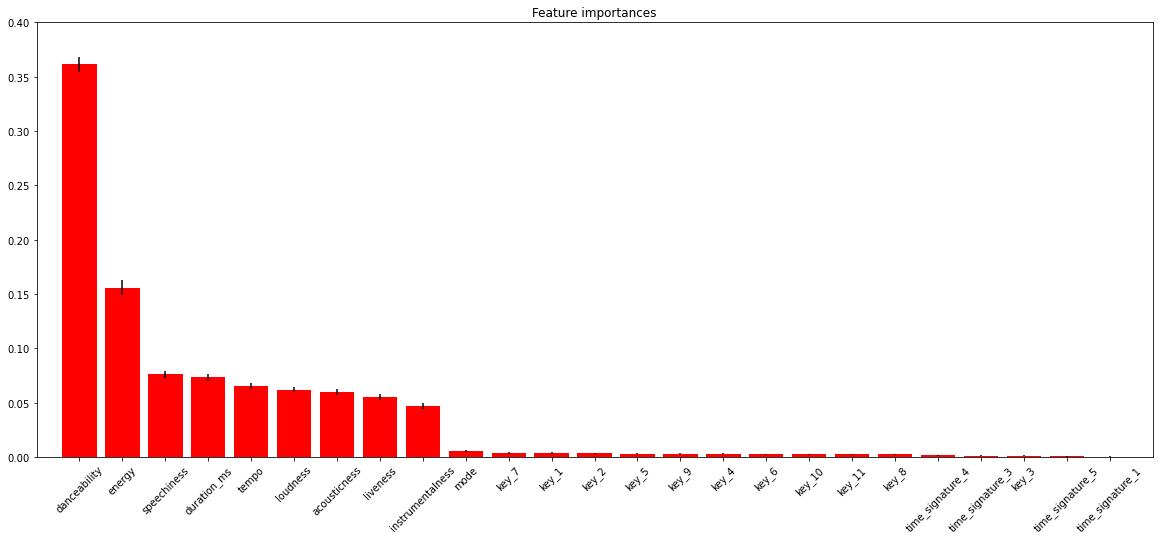

In [35]:
# Plot the feature importances of the forest
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(characteristics.shape[1]), random_forest_importances[rf_valence_indices],
        tick_label=[feature_cols[x] for x in rf_valence_indices],
        color="r", yerr=rf_valence_std[rf_valence_indices], align="center")
plt.xlim([-1, characteristics.shape[1]])
plt.ylim(0, 0.4)
_ = plt.xticks(rotation=45)

* As we can see, the feature that influences more -and with notable difference- the valence metric is **danceability**. 
* Following with less impact and in descending order, are the features: energy, speechiness, duration_ms, tempo, loudness, acousticness, liveness and instrumentalness

### Neural Network

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras import regularizers

* As we saw before, our data have big differences in terms of standard deviation of the music features. 

* We will use TensorFlow's `Normalization()` layer.

* Their values are set before training using `adapt()` in a process called *adaptation*.

* Adaptation will produce a normalizer that holds the mean, the variance, and the count.

In [121]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

After some trial runs, exploring thoroughly different models and architectures, we concluded in the following choices:

* In order to avoid overfitting we added *regularization* which pushes weights towards zero. Also, we added an Early Stopping callback function for the same purpose which stops training once the model performance stops improving on a hold out validation dataset.

* We did not opt for a bigger model because a smaller one had better results.

* We opted for Adam optimizer.

* We calculated the `Mean Absolute Error` as a metric for performance.

In [122]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

In [123]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 25)                51        
_________________________________________________________________
dense_9 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 1,972
Trainable params: 1,921
Non-trainable params: 51
_________________________________________________________________


We now plot the evolution of the training error and the validation error

In [124]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=13)

num_epochs = 150

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    callbacks=[early_stop],
    validation_split=0.2,
    verbose=1)

Epoch 1/150
884/884 [==============================] - 1s 1ms/step - loss: 0.2733 - val_loss: 0.2016
Epoch 2/150
884/884 [==============================] - 1s 909us/step - loss: 0.1925 - val_loss: 0.1842
Epoch 3/150
884/884 [==============================] - 1s 904us/step - loss: 0.1762 - val_loss: 0.1739
Epoch 4/150
884/884 [==============================] - 1s 901us/step - loss: 0.1663 - val_loss: 0.1671
Epoch 5/150
884/884 [==============================] - 1s 1ms/step - loss: 0.1611 - val_loss: 0.1604
Epoch 6/150
884/884 [==============================] - 1s 2ms/step - loss: 0.1575 - val_loss: 0.1561
Epoch 7/150
884/884 [==============================] - 1s 1ms/step - loss: 0.1533 - val_loss: 0.1538
Epoch 8/150
884/884 [==============================] - 1s 1ms/step - loss: 0.1514 - val_loss: 0.1525
Epoch 9/150
884/884 [==============================] - 1s 984us/step - loss: 0.1503 - val_loss: 0.1513
Epoch 10/150
884/884 [==============================] - 1s 998us/step - loss: 0.147

In [125]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

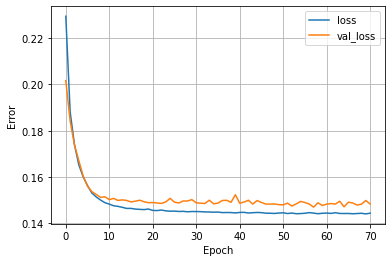

In [126]:
plot_loss(history)

We will evaluate the performance of our neural network by calculating the `Mean Absolute Error`

In [127]:
model.evaluate(X_test, y_test, verbose=0)

0.14203670620918274

**Conclusion:** 
We achieved our best results with a non-connectivist approach. Random Forest Regressor proved to be a better choice for our data and effort.

## Final Test with *test track ids*

To start with, we try to get the test data, by retrieving them from the Spotify API, using the given ids

In [128]:
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

* For storing my credentials, I created a file `spotify_config.py` with the following contents:

  ```
  config = {
      'client_id' : 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
      'client_secret' :'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
  }
  ```

In [129]:
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [130]:
test_tracks = pd.read_csv('spotify_ids.txt', header=None)
test_tracks.columns=['id']
test_tracks

,id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


* We will get, for each of the given tracks, its [audio features](https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features).

* To do that, we'll create a dictionary keyed by `id`, with values being the audio features for the specific track.

In [131]:
features = {}
track_ids = list(test_tracks['id'].unique())

In [132]:
start = 0
num_tracks = 100
while start < len(track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [133]:
test_data = pd.DataFrame.from_dict(features, orient='index')
test_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [134]:
test_data = test_data.reset_index(drop=True)
test_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In order for the test data to have the same features as our train data we:
* Created dummies
* Dropped the key_0 variable

In [135]:
features = test_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'time_signature']].copy()
features = pd.get_dummies(features, columns=["key", 'time_signature'])
features

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.585,0.436,-8.761,1,0.0601,0.72100,0.000013,0.1050,143.874,242014,...,0,0,0,0,1,0,0,0,1,0
1,0.680,0.826,-5.487,1,0.0309,0.02120,0.000012,0.5430,118.051,215627,...,0,0,0,0,0,0,0,0,1,0
2,0.514,0.730,-5.934,1,0.0598,0.00146,0.000095,0.0897,171.005,200040,...,0,0,0,0,0,0,0,0,1,0
3,0.731,0.573,-10.059,0,0.0544,0.40100,0.000052,0.1130,109.928,205090,...,0,0,0,0,0,0,0,0,1,0
4,0.907,0.393,-7.636,0,0.0539,0.45100,0.000001,0.1350,104.949,205458,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,-5.167,1,0.3370,0.13800,0.000000,0.1400,133.997,257428,...,0,0,0,1,0,0,0,0,1,0
1158,0.588,0.850,-6.431,1,0.0318,0.16800,0.002020,0.0465,93.003,187310,...,0,0,0,0,0,0,0,0,1,0
1159,0.754,0.660,-6.811,1,0.2670,0.17900,0.000000,0.1940,83.000,209299,...,0,0,0,0,0,0,0,0,1,0
1160,0.584,0.836,-4.925,1,0.0790,0.05580,0.000000,0.0663,104.973,202204,...,0,0,0,0,0,0,0,0,1,0


In [136]:
features.drop('key_0', axis= 1, inplace=True)

In [137]:
features.columns

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5'],
      dtype='object')

In [138]:
important_data.columns

Index(['valence', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms',
       'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8',
       'key_9', 'key_10', 'key_11', 'time_signature_1', 'time_signature_3',
       'time_signature_4', 'time_signature_5'],
      dtype='object')

Now that we are sure that we have the same features in both our training and our final given testing dataset, we make our evaluations:

In [139]:
features = features.values
target = test_data.valence


We also wanted to evaluate the **performance of our neural network** with the **given test dataset** *even though it was not our best model*: 

In [140]:
model.evaluate(features, target, verbose=0)

0.15896670520305634

### Best Model: Random Forest Regressor

As we saw before, the technique with the best results both in R2 Score and in Mean Absolute Score is **Random Forest Regressor**, it offered better results from our neural network. 

* These are the results it offers using the test dataset:

In [141]:
print('R2 Score:',metrics.r2_score(target, tuned_randomreg.predict(features)))
print('Mean absolute error:', mean_absolute_error(target, tuned_randomreg.predict(features)))


R2 Score: 0.33170233667552396
Mean absolute error: 0.15429063012048191


**Conclusion:**
We achieved our best results with a non-connectivist approach, although our results were very close. Random Forest Regressor proved to be a better choice for our data and effort.